In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed May 11 18:31:30 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
pip install transformers

     |████████████████████████████████| 4.0 MB 4.2 MB/s 
     |████████████████████████████████| 596 kB 72.2 MB/s 
     |████████████████████████████████| 6.6 MB 57.1 MB/s 
     |████████████████████████████████| 880 kB 77.9 MB/s 
     |████████████████████████████████| 84 kB 3.9 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=4c567bf98c3366e35749e3b54ecab625d143ffadac5b6f747752377432e66c11
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [5]:
pip install bert_score

     |████████████████████████████████| 60 kB 2.9 MB/s 


In [6]:
from bert_score import score

In [7]:
# cloning the repo because we need to get some example data
!git clone https://github.com/Tiiiger/bert_score.git

Cloning into 'bert_score'...
remote: Enumerating objects: 881, done.
remote: Counting objects: 100% (243/243), done.
remote: Compressing objects: 100% (112/112), done.
remote: Total 881 (delta 139), reused 229 (delta 130), pack-reused 638
Receiving objects: 100% (881/881), 1.32 MiB | 2.10 MiB/s, done.
Resolving deltas: 100% (454/454), done.


In [8]:
with open("/content/drive/MyDrive/traindata/training-monolingual-nc-v13/news-commentary-v13.cs") as f:
    cands_cs = [line.strip() for line in f]

with open("/content/drive/MyDrive/traindata/training-monolingual-nc-v13/news-commentary-v13.de") as f:
    cands_de = [line.strip() for line in f]

with open("/content/drive/MyDrive/traindata/training-monolingual-nc-v13/news-commentary-v13.ru") as f:
    cands_ru = [line.strip() for line in f]

with open("/content/drive/MyDrive/traindata/training-monolingual-nc-v13/news-commentary-v13.zh") as f:
    cands_zh = [line.strip() for line in f]


with open("/content/drive/MyDrive/traindata/training-monolingual-nc-v13/news-commentary-v13.en") as f:
    refs = [line.strip() for line in f]

In [9]:
cands_cs_sample = cands_cs[0:10000]
cands_de_sample = cands_de[0:10000]
cands_ru_sample = cands_ru[0:10000]
cands_zh_sample = cands_zh[0:10000]
refs_sample = refs[0:10000]

In [14]:
P, R, F1 = score(cands_ru_sample, refs_sample, lang="ru", model_type="bert-large-uncased", verbose=True)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.25G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


calculating scores...
computing bert embedding.


  0%|          | 0/313 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/157 [00:00<?, ?it/s]

done in 262.15 seconds, 38.15 sentences/sec


In [15]:
F1.mean()

tensor(0.3113)

In [16]:
R.mean()

tensor(0.3879)

In [17]:
P.mean()

tensor(0.2624)

In [ ]:
print(f"System level F1 score: {F1.mean():.3f}")

System level F1 score: 0.494


In [ ]:
import matplotlib.pyplot as plt

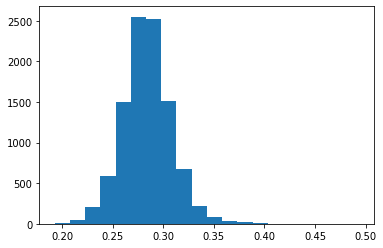

In [ ]:
plt.hist(F1, bins=20)
plt.show()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


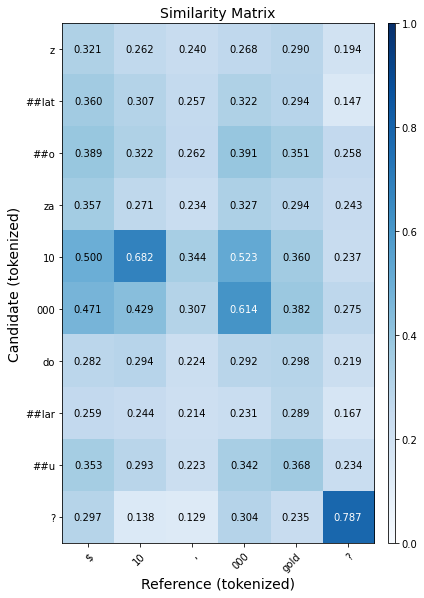

In [ ]:
from bert_score import plot_example

cand = cands_cs_sample[0]
ref = refs_sample[0]
plot_example(cand, ref, lang="cs", model_type="bert-base-uncased")

In [ ]:
score1=[]
All_score1=[]

In [ ]:
score1.append(F1.mean())
All_score1.append(F1)
print(score1)
print(All_score1)

[tensor(0.2841), tensor(0.2832), tensor(0.2159), tensor(0.2242)]
[tensor([0.4936, 0.3655, 0.2843,  ..., 0.2808, 0.2871, 0.2759]), tensor([0.6100, 0.3865, 0.2891,  ..., 0.2857, 0.3121, 0.3027]), tensor([0.4023, 0.2547, 0.2323,  ..., 0.2058, 0.2476, 0.2078]), tensor([0.5917, 0.3005, 0.2342,  ..., 0.2093, 0.2494, 0.2649])]


In [ ]:
score2=[]
All_score2=[]

In [ ]:
score2.append(F1.mean())
All_score2.append(F1)
print(score2)
print(All_score2)

[tensor(0.3752), tensor(0.3810), tensor(0.3113), tensor(0.3086)]
[tensor([0.5662, 0.4164, 0.4272,  ..., 0.3772, 0.3690, 0.3608]), tensor([0.6797, 0.4381, 0.4164,  ..., 0.3925, 0.3619, 0.3362]), tensor([0.4596, 0.3054, 0.3290,  ..., 0.3134, 0.3000, 0.3128]), tensor([0.5841, 0.3162, 0.3348,  ..., 0.3004, 0.2742, 0.2896])]


In [ ]:
score3=[]
All_score3=[]

In [ ]:
score3.append(F1.mean())
All_score3.append(F1)
print(score3)
print(All_score3)

[tensor(0.4676), tensor(0.4689), tensor(0.4146), tensor(0.4125)]
[tensor([0.6151, 0.6020, 0.5070,  ..., 0.4855, 0.4756, 0.4529]), tensor([0.7056, 0.6086, 0.4687,  ..., 0.4750, 0.4626, 0.4875]), tensor([0.5474, 0.5600, 0.4374,  ..., 0.4047, 0.3951, 0.4037]), tensor([0.6931, 0.5375, 0.4503,  ..., 0.3997, 0.4259, 0.4367])]


In [ ]:
score4=[]
All_score4=[]

In [ ]:
score4.append(F1.mean())
All_score4.append(F1)
print(score4)
print(All_score4)

[tensor(0.6126), tensor(0.6263), tensor(0.6203), tensor(0.6181)]
[tensor([0.7739, 0.7993, 0.7783,  ..., 0.6278, 0.5805, 0.6021]), tensor([0.7768, 0.8765, 0.7502,  ..., 0.6464, 0.5928, 0.6126]), tensor([0.7994, 0.5694, 0.7169,  ..., 0.6048, 0.6135, 0.6162]), tensor([0.8102, 0.6018, 0.6363,  ..., 0.6255, 0.5862, 0.6332])]


In [ ]:
score5=[]
All_score5=[]

In [ ]:
score5.append(F1.mean())
All_score5.append(F1)
print(score5)
print(All_score5)

[tensor(0.6072), tensor(0.5940), tensor(0.5319), tensor(0.4943)]
[tensor([0.7471, 0.6110, 0.6277,  ..., 0.5748, 0.6155, 0.5825]), tensor([0.7617, 0.6499, 0.6134,  ..., 0.5751, 0.5999, 0.5622]), tensor([0.6035, 0.6111, 0.5135,  ..., 0.4983, 0.5392, 0.5034]), tensor([0.7116, 0.5458, 0.5313,  ..., 0.4864, 0.4768, 0.5310])]


In [ ]:
import numpy as np
np.save('Mean_score_1.npy',score1)
np.save('All_score_1.npy',All_score1)
np.save('Mean_score_2.npy',score2)
np.save('All_score_2.npy',All_score2)
np.save('Mean_score_3.npy',score3)
np.save('All_score_3.npy',All_score3)
np.save('Mean_score_4.npy',score4)
np.save('All_score_4.npy',All_score4)
np.save('Mean_score_5.npy',score5)
np.save('All_score_5.npy',All_score5)


/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:528: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  arr = np.asanyarray(arr)
/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)
